In [15]:
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def init_plot():
    plt.figure(figsize=(9, 9), dpi=80, facecolor='w', edgecolor='k')
    plt.ylim(-1.0, 4.0)
    plt.grid(True, which='both', color='lightblue', linestyle="dotted")
    plt.axhline(y=0, color='lightgrey', linestyle="dashed")
    plt.axvline(x=0, color='lightgrey', linestyle="dashed")
    return plt


# 2D Vectors

Angle between two vectors $u$ and $v$ is $$ cos(\theta) = {u \cdot v \over{|u| |v|}}$$


In [21]:
origin = np.zeros(2)
# theta_a = np.pi * 1/4
theta_a = np.pi * 2/7
a = np.array([np.cos(theta_a) * 2, np.sin(theta_a) * 2])
theta_b = np.pi * 1/7
b = np.array([np.cos(theta_b) * 1.3, np.sin(theta_b) * 1.3])

c = np.add(a, b)
d = np.subtract(a, b)

dotp = np.dot(a, b)

theta = np.arccos(
    dotp /
    (np.hypot(a[0], a[1]) * np.hypot(b[0], b[1]))
)
print('dotp', dotp)
print('theta_a', theta_a)
print('theta_b', theta_b)
print('theta', theta)

theta_int = theta_a - theta

e = np.array([np.cos(theta_int), np.sin(theta_int)])


('dotp', 2.3425190565462897)
('theta_a', 0.8975979010256552)
('theta_b', 0.4487989505128276)
('theta', 0.44879895051282781)


Direction of deflection when $b$ bounces off $a$ is given by subtraction $$ a - b $$


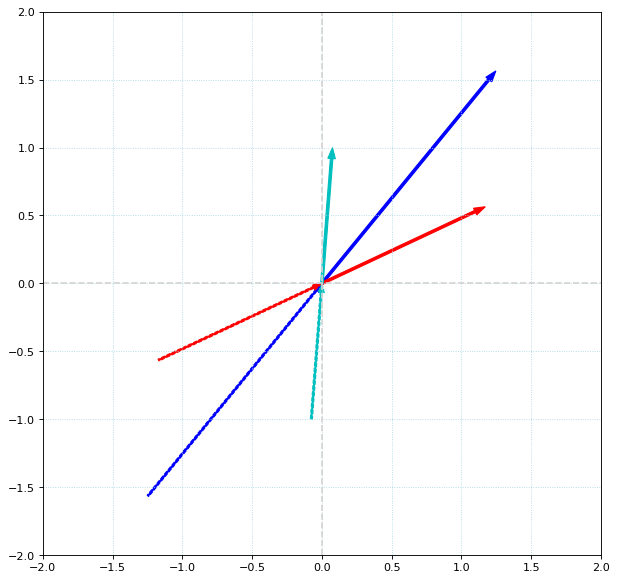

In [38]:
plt = init_plot()
plt.xlim(-2, 2)
plt.ylim(-2, 2)


def plot_vec(v, color = 'k', label=''):
    plt.arrow(origin[0], origin[1], v[0], v[1], color=color, width=0.018, length_includes_head=True, label='label')
    plt.arrow(-v[0], -v[1], v[0], v[1], color=color, width=0.015, length_includes_head=True, linestyle='--')

    
plot_vec(a, 'b', 'a')
plot_vec(b, 'r', 'b')
# plot_vec(c, 'g')
plot_vec(d, 'c', 'a-b')
# plot_vec(e, 'k')


# Line Intersection

In [41]:
class Vec:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def determinant(a, b, c, d):
    return a * d - c * b

def distance(a, b):
    x = a.x - b.x
    y = a.y - b.y
    return np.hypot(x, y)

def line_distance(a):
    return distance(Vec(a[0], a[1]), Vec(a[2], a[3]))

# Takes vec objects for the start and end of lines from a to b and c to d
# Returns point of intersection, assuming infinitely long lines
def vec_lines_intersection(va, vb, vc, vd):
    denominator = determinant(
            va.x - vb.x, va.y - vb.y,
            vc.x - vd.x, vc.y - vd.y
        )
    if(denominator == 0):
        return None    
    determinant_axaybxby = determinant(va.x, va.y, vb.x, vb.y)
    determinant_cxcydxdy = determinant(vc.x, vc.y, vd.x, vd.y)
    x = determinant(
            determinant_axaybxby, va.x - vb.x,
            determinant_cxcydxdy, vc.x - vd.x
        ) / denominator
    y = determinant(
            determinant_axaybxby, va.y - vb.y,
            determinant_cxcydxdy, vc.y - vd.y
        ) / denominator
    return Vec(x, y)

# Takes two lists for start and end of lines a and b where each is a list like [x1, y1, x2, y2]
def list_lines_intersection(a, b):
    return vec_lines_intersection(Vec(a[0], a[1]), Vec(a[2], a[3]), Vec(b[0], b[1]), Vec(b[2], b[3]))

b line length: 1.166190 | start of b to gb intersection 0.145774 | start of b to rb intersection 1.301794


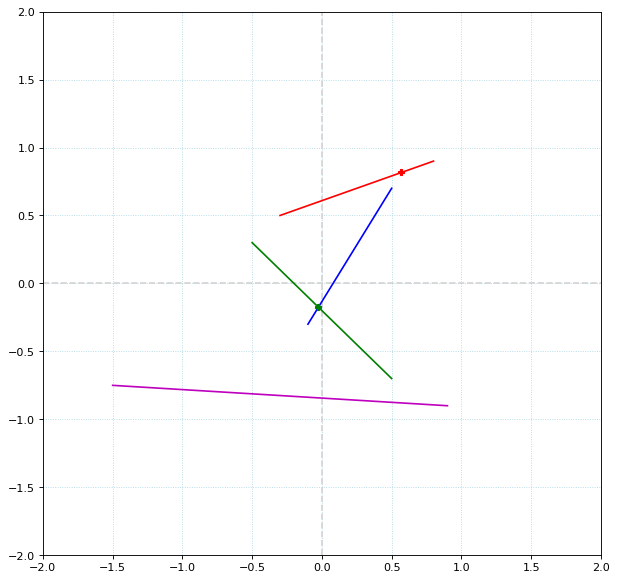

In [52]:
plt = init_plot()
plt.xlim(-2, 2)
plt.ylim(-2, 2)

b_line = [-0.1, -0.3, 0.5, 0.7]
plt.plot(b_line[::2], b_line[1::2], '-b')

g_line = [-0.5, 0.3, 0.5, -0.7]
plt.plot(g_line[::2], g_line[1::2], '-g')

r_line = [-0.3, 0.5, 0.8, 0.9]
plt.plot(r_line[::2], r_line[1::2], '-r')

m_line = [-1.5, -0.75, 0.9, -0.9]
plt.plot(m_line[::2], m_line[1::2], '-m')

pt_gb = list_lines_intersection(g_line, b_line)
plt.plot([pt_gb.x], [pt_gb.y], 'Pg')

pt_rb = list_lines_intersection(r_line, b_line)
plt.plot([pt_rb.x], [pt_rb.y], 'Pr')

b_line_len = line_distance(b_line)
b_to_gb_len = line_distance([b_line[0], b_line[1], pt_gb.x, pt_gb.y])
b_to_rb_len = line_distance([b_line[0], b_line[1], pt_rb.x, pt_rb.y])

print("b line length: %f | start of b to gb intersection %f | start of b to rb intersection %f" % \
         (b_line_len, b_to_gb_len, b_to_rb_len))

# pt_gb_dist = distance(Vec(g_line[0], g_line[1]), pt_gb)
# pt_rb_dist = distance(Vec(r_line[0], r_line[1]), pt_rb)

# bounce_dist = g_line_dist - pt_gb_dist

# v = Vec(g_line[0] - pt_gb.x, g_line[1] - pt_gb.y)

# # plt.plot([pt_gb.x, pt_gb.x+v.x], [pt_gb.y, pt_gb.y+v.y], '--w')

# norm = Vec(b_line[3] - b_line[1] * -1.0, b_line[2] - b_line[0])

# # plt.plot([pt_gb.x, pt_gb.x+norm.x], [pt_gb.y, pt_gb.y+norm.y], '--k')

# print(g_line_dist, pt_gb_dist, bounce_dist)
# print(v.x, v.y)


In [14]:
a = r_line
b = m_line
va = vec_lines_intersection(Vec(a[0], a[1]), Vec(a[2], a[3]), Vec(b[0], b[1]), Vec(b[2], b[3]))
print([va.x, va.y])


[-3.409333333333334, -0.6306666666666668]


With parallel lines...

In [13]:
print(vec_lines_intersection(Vec(1, 1), Vec(2, 2), Vec(3, 3), Vec(4, 4)))

None


# Parabola: $ y = (x + h)^2 + k $

In [ ]:
x = np.linspace(-2, 2, 500)
h = np.linspace(-1, 1, 3)
k = -0.2

p = init_plot()
for _h in h:
    p.plot(x, pow(x + _h, 2) + k, '-')

## Trig Functions

In [ ]:
x = np.linspace(-np.pi * 2.5, np.pi * 5, 300)

p = init_plot()
p.xlim(-np.pi * 2.5, np.pi * 5)
p.ylim(-1.5, 1.5)
p.plot(x, np.cos(x), '-b')
p.plot(x, np.sin(x), '-g')
p.plot(x, np.tan(x), '--m')


In [ ]:
a = [0.0, 0.0, 1.0, 1.0]
np.linalg.det(a)

In [ ]:
np.info(np.hypot)